In [ ]:
from math import *
from itertools import *
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

In [ ]:
# inputs: [w,a,s,d,space,sprint,shift]
def changeFacingX(facing):
  if facing < -45 and facing > -135:
    return

def isJumping(inputs, isGround):
  if "space" in inputs and isGround:
    return True

  return False

def getDirection(inputs):

  if "w" in inputs:
    if "a" in inputs:
      if "s" in inputs:
        return 90
      if "d" in inputs:
        return 0
      return 45
    if "s" in inputs:
      if "a" in inputs:
        return 90
      if "d" in inputs:
        return -90
      return 0
    if "d" in inputs:
      return -45

  if "a" in inputs:
    if "s" in inputs:
      if "d" in inputs:
        return 180
      return 135
    if "d" in inputs:
      return 0
    return 90

  if "s" in inputs:
    if "d" in inputs:
      return -135
    return -180

  if "w" in inputs:
    return 0

  return -90

def direction(facing):

  if "space" in inputs and isGround:
    return True

  return False

def isSprinting(inputs):

  if "w" in inputs and "sprint" in inputs and "sneak" not in inputs:
    if "w" in inputs and not "s" in inputs:
      return 0.2

  return 0

def isStrafing(inputs):

  if ("a" in inputs and "d" in inputs and ("w" in inputs or "s" in inputs)):
    return 0.98

  if ("a" in inputs and ("s" in inputs and "w" not in inputs)
  or ("d" in inputs and ("s" in inputs and "w" not in inputs))
  or ("a" in inputs and ("w" in inputs and "s" not in inputs))
  or ("d" in inputs and ("w" in inputs and "s" not in inputs))):
    return 1.0

  return 0.98

def isMoving(inputs):
  if "w" in inputs and "a" in inputs and "s" in inputs and "d" in inputs:
    return False

  if "w" in inputs and "s" in inputs and not ("a" in inputs or "d" in inputs):
    return False

  if "a" in inputs and "d" in inputs and not ("w" in inputs or "s" in inputs):
    return False

  return True

def getMovementType(inputs):

  if "w" in inputs and "sprint" in inputs and "sneak" not in inputs and "s" not in inputs:
    return 1.3 * isStrafing(inputs)

  if "sneak" in inputs and ("w" in inputs or "a" in inputs or "s" in inputs or "d" in inputs):
    return 0.3 * isStrafing(inputs)

  if "w" not in inputs and "a" not in inputs and "s" not in inputs and "d" not in inputs:
    return 0.0

  return 1.0 * isStrafing(inputs)


def calcX(veloBefore, slipBefore, slipCurrent, facing, isGround, inputs):

  if not isMoving(inputs):
    return 0

  if isGround and not isJumping(inputs, isGround):
    momentum = veloBefore * slipBefore * 0.91 + 0.1 * getMovementType(inputs) * 1.0 * (0.6/slipCurrent)**3 * sin(radians(getDirection(inputs)+(facing*-1)))
    return momentum

  if isJumping(inputs, isGround):
    momentum = veloBefore * slipBefore * 0.91 + 0.1 * getMovementType(inputs) * 1.0 * (0.6/slipCurrent)**3 * sin(radians(getDirection(inputs)+(facing*-1)))
    momentum = momentum + sin(radians((facing*-1))) * isSprinting(inputs)
    return momentum

  momentum = veloBefore * slipBefore * 0.91 + 0.02 * getMovementType(inputs) * sin(radians(getDirection(inputs)+(facing*-1)))
  return momentum


def calcZ(veloBefore, slipBefore, slipCurrent, facing, isGround, inputs):

  if not isMoving(inputs):
    return 0

  if isGround and not isJumping(inputs, isGround):
    momentum = veloBefore * slipBefore * 0.91 + 0.1 * getMovementType(inputs) * 1.0 * (0.6/slipCurrent)**3 * cos(radians(getDirection(inputs)+(facing*-1)))
    return momentum

  if isJumping(inputs, isGround):
    momentum = veloBefore * slipBefore * 0.91 + 0.1 * getMovementType(inputs) * 1.0 * (0.6/slipCurrent)**3 * cos(radians(getDirection(inputs)+(facing*-1)))
    momentum = momentum + cos(radians((facing*-1))) * isSprinting(inputs)
    return momentum

  momentum = veloBefore * slipBefore * 0.91 + 0.02 * getMovementType(inputs) * cos(radians(getDirection(inputs)+(facing*-1)))
  return momentum


In [ ]:
def drawForm(x1,z1,x2,z2):
  object = [x1,z1,x2,z2]
  plt.plot([x1,x2,x2,x1,x1], [z1,z1,z2,z2,z1], marker="o", linestyle='-')
  return object


In [ ]:
def possInputs(inputs):
  count = 0
  new_subset = []
  for L in range(0, len(inputs)+1):
    count = count + 1
    for subset in combinations(inputs, L):
      new_subset.append(subset)
  return new_subset

In [ ]:
def calcTickSpeed(speed, s1, s2, f, g, i, repeat):
  repeater = 0
  while repeater < repeat:
    speedX = calcX(speed[2], s1, s2, f, g, i)
    speedZ = calcZ(speed[3], s1, s2, f, g, i)
    speed[0].append(speedX+speed[0][len(speed[0])-1])
    speed[1].append(speedZ+speed[1][len(speed[1])-1])
    speed[2] = speedX
    speed[3] = speedZ
    repeater += 1
  return speed


X_Before:  -0.11674471137150988
X_Landing:  0.018408126289187976


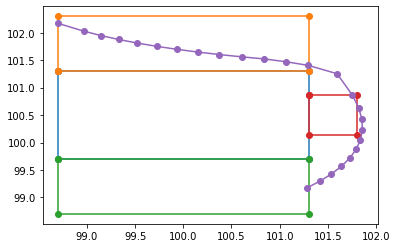

<Figure size 1080x360 with 0 Axes>

In [ ]:
speed = [[98.701],[102.170],0,0]
facing = -135.4

speed = calcTickSpeed(speed, 0.6, 0.6, facing, True, ["w","d","sprint","space"],1) #1
speed = calcTickSpeed(speed, 0.6, 1, facing, False, ["w","d","sprint"],1) #2
speed = calcTickSpeed(speed, 1, 1, facing, False, ["w","d","sprint"],8) #3
speed = calcTickSpeed(speed, 1, 1, facing, False, ["w","sprint"],2)#11
speed = calcTickSpeed(speed, 1, 0.6, facing, True, ["w","sprint"],1)#13
facing = facing - 28
speed = calcTickSpeed(speed, 0.6, 0.6, facing, True, ["w","a","space","sprint"],1)#14
facing = 173
speed = calcTickSpeed(speed, 0.6, 1, facing, False, ["w","a","sprint"],1)#15
facing = facing - 29
speed = calcTickSpeed(speed, 1, 1, facing, False, ["w","a","sprint"],9)#16


# Plot the objects
drawForm(98.700, 101.300, 101.300, 99.700)
drawForm(98.700, 101.300, 101.300, 102.300)
drawForm(98.700, 99.700, 101.300, 98.700)
drawForm(101.300, 100.863, 101.800, 100.137)

# Plot the path
plt.plot(speed[0], speed[1], marker="o", linestyle='-')
#plt.xticks(ticks=[98,99,100,101])
#plt.yticks(ticks=[98,99,100,101])
plt.figure(figsize=(15,5))

print("X_Before: ", (-1)*(speed[0][len(speed[0])-2]-101.3000))
print("X_Landing: ", (-1)*(speed[0][len(speed[0])-1]-101.3000))

# Display the plot in the window
plt.show()

Possible Inputs in a tick. Assuming Fast Math and only a spectrum of 90°. (Seems like most jumps dont require more)
Limiting bouding box + only allowing certain angleradius from current position to account for momentum canceling (which we dont want):
Factor of ~3 less angles.\
Angles: $\frac{4096}{4*3} = 341$

**Possible inputs** optimization for **1 tick**:\
[[w,s],[a,d],[shift,r],space] => $3^3 *2^2 * 341 = 36828$ \
 \
**Possible inputs** optimization for **1 tick in air**:\
[[w,s],[a,d],[shift,r]] => $3^3 * 341 = 9207$ \
\
**Possible inputs** optimization for **1t in air + sprint**: \
[[w,s],[a,d],r] => $3^2*2 * 341 = 6138$ \
\
**Possible inputs** optimization for **1t in air + sneak**: \
[[w,s],[a,d]] => $3^2 * 341 = 3069$ \


Stupid Testing:
- 1.5072484 [w,a,d] for 7 ticks
- 1.5072484 [w] for 7 ticks
- 1.9594228  [w,a,d,sprint] for 7 ticks
- 6.9725506 [w,a,d,sprint] for 17 ticks: 2 tick space, 14 tick space
- 6.9725506 [w,sprint] for 17 ticks: 2 tick space, 14 tick space>

